In [2]:
import numpy as np
import matplotlib.pyplot as plt

Question 1: finding the probability for l >t: P = 2l/pi*d
This adjusted analytical approach provides a practical method for estimating the probability in scenarios where the needle length exceeds the line spacing. It simplifies the problem by avoiding complex integrations that would be necessary to account for the precise number of crossings, especially as the ratio 
increases significantly.

In [13]:
def simulate_buffons_needle(l, t, num_trials=1000000):
    crossings = 0
    for _ in range(num_trials):
        x = np.random.uniform(0, t/2)
        theta = np.random.uniform(0, np.pi/2)

        # Check if the needle crosses a line
        if (l / 2) * np.sin(theta) >= x:
            crossings += 1
    probability = crossings / num_trials
    return probability

# Parameters for l > t
l = 10 
t = 3   

# Running the simulation
probability = simulate_buffons_needle(l, t)
print(f"Estimated Probability of crossing for l > t: {probability:.4f}")


Estimated Probability of crossing for l > t: 0.9035


Question 2: finding the probability when l = 2, t =3: 

In [8]:

def simulate_buffons_needle(l, t, num_trials=100000):
    crossing = 0
    for _ in range(num_trials):
        x = np.random.uniform(0, t/2)
        theta = np.random.uniform(0, np.pi/2)

        if (l/2) * np.sin(theta) >= x:
            crossing += 1
    
    probability = crossing / num_trials
    estimated_pi = (l * 2) / (t * probability)
    
    return probability, estimated_pi


# parameters
l = 2
t = 3

# Running the simulation
probability, estimated_pi = simulate_buffons_needle(l, t, num_trials=100000)
print(f"Estimated Probability: {probability:.4f}")
print(f"Estimated value of π: {estimated_pi:.4f}")



Estimated Probability: 0.4245
Estimated value of π: 3.1406


Question 3: finding the probability when l > t where as l = 5, t =3

In [10]:

def simulate_buffons_needle(l, t, num_trials=100000):
    crossing = 0
    for _ in range(num_trials):
        x = np.random.uniform(0, t/2)
        theta = np.random.uniform(0, np.pi/2)

        if (l/2) * np.sin(theta) >= x:
            crossing += 1

        elif l * np.sin(theta) >= t:
            crossing += 1

    probability = crossing / num_trials
    estimated_pi = (l * 2) / (t * probability)
    
    return probability


# parameters
l = 5
t = 3

# Running the simulation
probability = simulate_buffons_needle(l, t, num_trials=100000)
print(f"Estimated Probability: {probability:.4f}")


Estimated Probability: 0.8018


Question 4: Probability vs l/t ratio

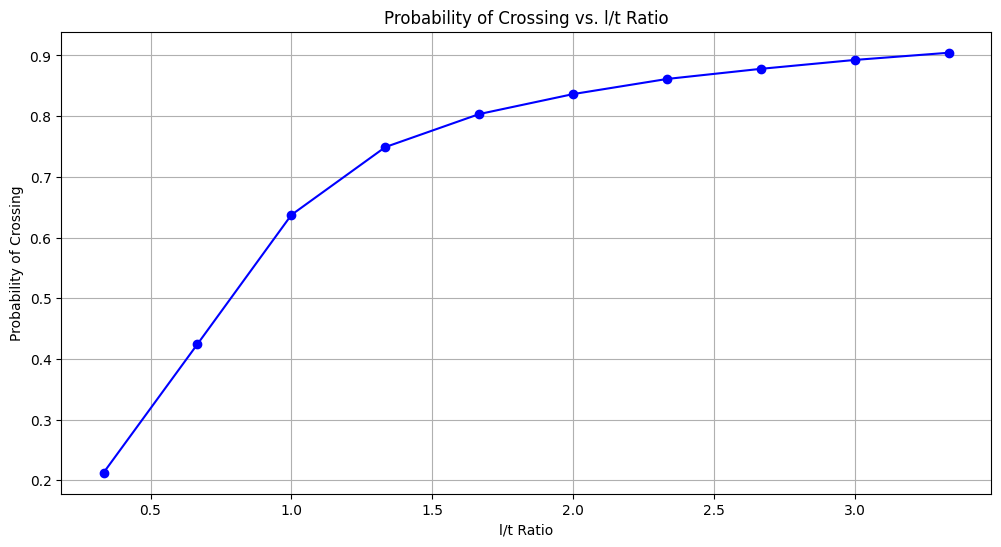

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_buffons_needle(l, t, num_trials=100000):
    crossing = 0
    for _ in range(num_trials):
        x = np.random.uniform(0, t/2)
        theta = np.random.uniform(0, np.pi/2)

        if (l/2) * np.sin(theta) >= x:
            crossing += 1

        elif l * np.sin(theta) >= t:
            crossing += 1

    probability = crossing / num_trials
    estimated_pi = (l * 2) / (t * probability)
    
    return probability
# Setting up ranges and parameters
t = 3  

l_values = np.linspace(1, 10, 10)
ratios = l_values / t
probabilities = [simulate_buffons_needle(l, t) for l in l_values]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(ratios, probabilities, label="monte Carlo", marker='o', linestyle='-', color='b')
plt.title('Probability of Crossing vs. l/t Ratio')
plt.xlabel('l/t Ratio')
plt.ylabel('Probability of Crossing')
plt.grid(True)
plt.show()

Question 4: Analytical vs monte carlo P(l/t)

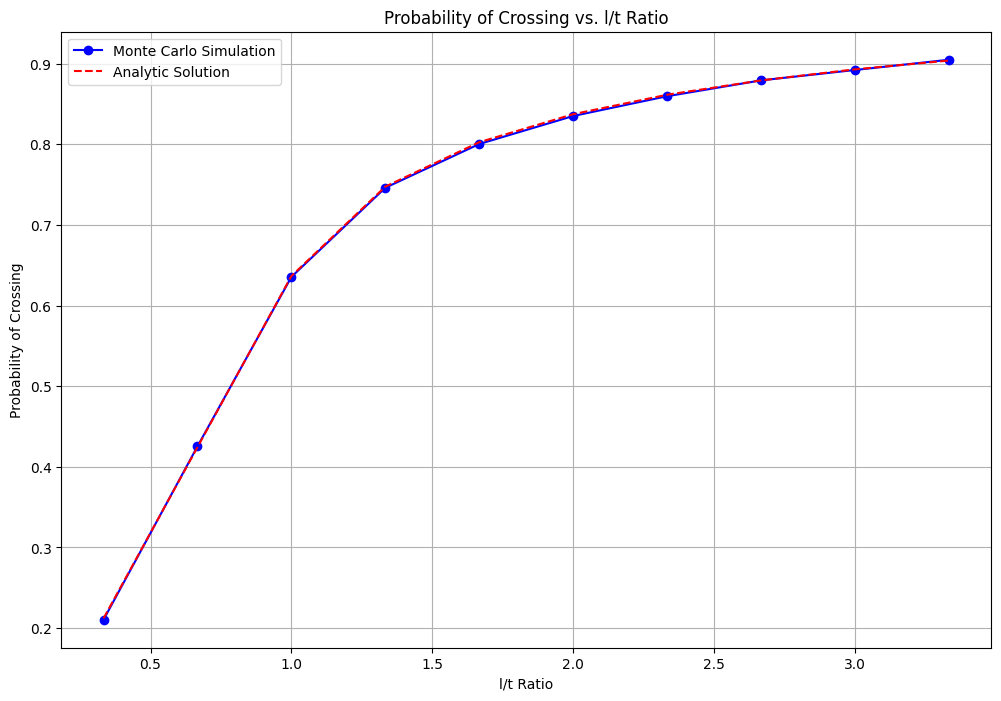

In [12]:

l_values = np.linspace(1, 10, 10)

probabilities = [simulate_buffons_needle(l, t) for l in l_values]

# Calculate analytic probabilities
analytic_probabilities = [
    2 / np.pi * np.arccos(t/l) + 2/np.pi * (l/t)*(1 - np.sqrt(1-(t/l)**2)) if l > t else (2*l) / (t * np.pi)
    for l in l_values
]

# Plotting the results monte vs analytical
plt.figure(figsize=(12, 8))
plt.plot(ratios, probabilities, marker='o', linestyle='-', color='b', label='Monte Carlo Simulation')
plt.plot(ratios, analytic_probabilities, linestyle='--', color='r', label='Analytic Solution')
plt.title('Probability of Crossing vs. l/t Ratio')
plt.xlabel('l/t Ratio')
plt.ylabel('Probability of Crossing')
plt.legend()
plt.grid(True)
plt.show()